In [17]:
from __future__ import division
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.create_model_pickle import *

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: EDA 

In [3]:
data_path = "../data/data.json"
df = pd.read_json(data_path)

In [4]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


## Add Fraud Column

 * Do not include Spammers

In [5]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [6]:
### POTENTIAL PIPELINE STEP
df['fraud'] = df['acct_type'].str.contains("fraud")

In [7]:
df['fraud'].value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

 * Unbalanced Classes

### Feature Exploration

##### Description Box

In [8]:
### ADD TO PIPELINE

df['empty_desc'] = df['description'] == u''

In [9]:
df[df['fraud'] == True]['empty_desc'].value_counts()

False    963
True     330
Name: empty_desc, dtype: int64

In [ ]:
(df[df['fraud'] == False]['empty_desc'] == True).sum()

499

#### Find Features To Eliminate
 * Description (body length contains info)

Body Length - Can Eliminate Description Field

In [ ]:
fraud_short_list = []
premium_short_list = []
cutoffs = range(2, 2000)

for cutoff_length in cutoffs:

    df['short_description'] = df['body_length'] < cutoff_length


    fraud_short = float((df[df['fraud'] == True]['short_description'] == True).sum())\
                   / float((df[df['fraud'] == True]['short_description'] == False).count())

    premium_short = float((df[df['fraud'] == False]['short_description'] == True).sum()) \
                    / (df[df['fraud'] == False]['short_description'] == False).count()

    ratio = fraud_short / premium_short
    fraud_short_list.append(ratio)
    


In [ ]:
    
plt.figure(figsize=(10, 7))
plt.subplot(111)
plt.plot(cutoffs, fraud_short_list, 'b--')
ax = plt.gca()
ax.set_xlim([0, 250])
plt.title("Description Lengths")
plt.ylabel("Fraud Shorts / Non-Fraud Shorts")
plt.xlabel("Shortness Cutoff")

plt.savefig("../images/cutoff.png")
    


    

In [ ]:
ratio_list = []
thresholds_1 = range(2, 2000)
feature = "body_length"

def list_ratios(feature, thresholds):
    """
    For plotting a comparison of the fraud/nonfraud ratio of 
    a particular feature at various thresholds
    """
    for threshold in thresholds:

        df['comparison'] = df[feature] < threshold


        fraud_short = float((df[df['fraud'] == True]['comparison'] == True).sum())\
                       / float((df[df['fraud'] == True]['comparison'] == False).count())

        premium_short = float((df[df['fraud'] == False]['comparison'] == True).sum()) \
                        / (df[df['fraud'] == False]['comparison'] == False).count()

        ratio = fraud_short / premium_short
        ratio_list.append(ratio)
        
    return ratio_list

In [ ]:
# BAR CHART FOR BOOLEAN RELATIVE RATIOS

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from src.pipeline import pipeline_json
pj = pipeline_json('../data/data.json')
df = pj.convert_to_df()

In [ ]:
df[100:150].head()

In [ ]:
df['account_life'] = df['event_created'] - df['user_created']
df['account_life'] = df['account_life'].dt.days

In [ ]:
ax = df[df['fraud'] == True]['account_life'].hist()
ax.set_xlim([0, 500])

In [ ]:
ax = df[df['fraud'] == False]['account_life'].hist()
ax.set_xlim([0, 2000])

In [ ]:
rangeratio = xrange(5, 2000)
ratiolist = list_ratios('account_life', rangeratio)

    
plt.figure(figsize=(10, 7))
plt.subplot(111)
plt.plot(rangeratio, ratiolist, 'b--')
ax = plt.gca()
ax.set_xlim([0, 250])
plt.title("Account Life")
plt.ylabel("Fraud / Non-Fraud")
plt.xlabel("Days")

plt.savefig("../images/acctcutoff.png")

# Logistic Model

In [21]:
import numpy as np
import pandas as pd

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.create_model_pickle import *

In [23]:
from src.pipeline import pipeline_json
pj = pipeline_json('../data/data.json')
X = pj.convert_to_df(scaling=True, filtered=True)
y = pj.output_labelarray()

In [25]:
from statsmodels.discrete.discrete_model import Logit

lr = Logit(np.array(y), np.array(X))
results = lr.fit()
results.summary()


TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n

In [26]:
results.params

NameError: name 'results' is not defined

In [27]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

kf = KFold(5)
splits = kf.split(X, y)



for train, test in splits:
    lr = LogisticRegression(class_weight='balanced', n_jobs=-1, C=0.1)
    lr.fit(X[train], y[train])
    print lr.score(X[test], y[test])
    y_pred = lr.predict(X[test])
    cm = confusion_matrix(y[test], y_pred)
    print confusion_matrix(y[test], y_pred)

KeyError: '[ 2868  2869  2870 ..., 14334 14335 14336] not in index'

In [ ]:
X_train

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

regularization_list = np.logspace(1, 0.00001, 50)

sensitivities = []
inv_specificities = []

thresholds = np.linspace(0, 1, 100)

for threshold in thresholds:
    lr = LogisticRegression(class_weight='balanced', n_jobs=-1, C=1)
    lr.fit(X_train, y_train)
    y_pred = (lr.predict_proba(X_test)[:, 1] > threshold)
    cm = confusion_matrix(y_test, y_pred)
    
    sensitivity = cm[1, 1] / np.sum(cm[1, :])
    inverse_specificity = 1 - (cm[0, 0] / np.sum(cm[0, :]))
    
    sensitivities.append(sensitivity)
    inv_specificities.append(inverse_specificity)
    
lr.classes_

array([False,  True], dtype=bool)

In [29]:
lr.get_params()

{'C': 1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

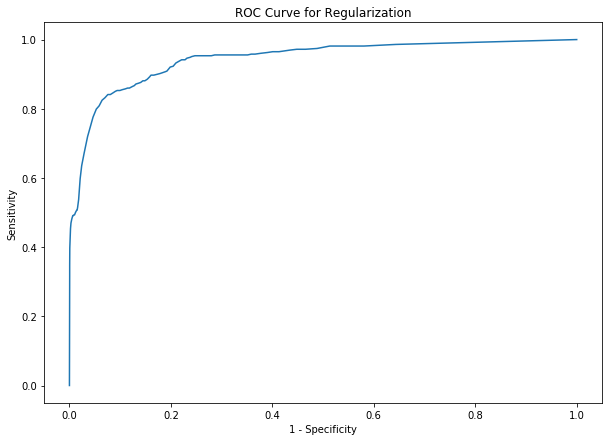

In [30]:
plt.figure(figsize=(10, 7))
plt.subplot(111)
plt.plot(inv_specificities, sensitivities)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve for Regularization')
plt.savefig('../images/roc_curve.png')

In [ ]:
# scorelist = []

# for trainidx, testidx in splits:
#     print 'loop'
#     lr = Logit(np.array(y[trainidx]), np.array(X[trainidx]))
#     results = lr.fit()
#     params = results.params
#     print results
    
#     y_predict = []
#     for row in X[testidx]:
#         print row
#         y_predict.append(results.predict(params, row))
#     y_predict = np.array(y_predict)
#     print testidx
#     print split
#     print results
#     print y_predict
#     scorelist.append((y[testidx] == y_predict).mean(axis=1))
    
